# Decision Tree Regressor Implementation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree


import warnings
warnings.filterwarnings("ignore")

In [6]:
x,y = make_regression(n_features=10,n_samples=300,n_targets=1,n_informative=7)

In [8]:
x.shape

(300, 10)

In [9]:
y.shape

(300,)

In [11]:
data = np.concatenate([x,y.reshape(300,1)],axis=1)

In [14]:
df = pd.DataFrame(x,columns=[f"col_{i+1}" for i in range (10)])

In [15]:
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,-0.690590,-1.477301,-0.860523,1.180285,1.258854,-1.519990,-1.667248,0.587608,-0.986009,0.117142
1,0.290011,1.651807,-0.785236,0.097139,0.867098,0.141270,-1.170013,2.296616,0.090275,-1.051649
2,1.511525,-0.860290,-0.281086,1.112825,-1.444462,0.904313,0.273963,0.393449,0.948347,1.656780
3,-0.106173,-0.835693,1.004892,0.005028,1.194316,0.922079,-1.314222,-0.754419,-2.103801,-1.979397
4,-0.843284,-0.691391,-0.307631,-1.781942,-1.180953,1.075917,-1.346268,-0.434883,0.328145,0.195243


In [16]:
df["target"] = y

In [17]:
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,target
0,-0.690590,-1.477301,-0.860523,1.180285,1.258854,-1.519990,-1.667248,0.587608,-0.986009,0.117142,-296.899348
1,0.290011,1.651807,-0.785236,0.097139,0.867098,0.141270,-1.170013,2.296616,0.090275,-1.051649,-38.779704
2,1.511525,-0.860290,-0.281086,1.112825,-1.444462,0.904313,0.273963,0.393449,0.948347,1.656780,161.767670
3,-0.106173,-0.835693,1.004892,0.005028,1.194316,0.922079,-1.314222,-0.754419,-2.103801,-1.979397,-121.444746
4,-0.843284,-0.691391,-0.307631,-1.781942,-1.180953,1.075917,-1.346268,-0.434883,0.328145,0.195243,-152.676547


In [19]:
df.corr()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,target
col_1,1.000000,-0.001940,-0.063580,0.097536,-0.040816,-0.003434,-0.062641,0.056644,0.015098,0.019304,-0.005729
col_2,-0.001940,1.000000,0.026330,0.048156,-0.010203,0.009927,-0.001887,0.080740,-0.050073,-0.138586,0.341839
col_3,-0.063580,0.026330,1.000000,-0.051442,0.038712,0.022712,-0.048272,0.026310,-0.102137,-0.131539,0.450188
col_4,0.097536,0.048156,-0.051442,1.000000,-0.041076,0.095290,0.028181,-0.027404,0.056786,0.037506,0.503030
col_5,-0.040816,-0.010203,0.038712,-0.041076,1.000000,0.001078,-0.015433,-0.035154,-0.027677,-0.130448,-0.039334
col_6,-0.003434,0.009927,0.022712,0.095290,0.001078,1.000000,-0.026966,0.022489,0.003071,-0.025538,0.514958
col_7,-0.062641,-0.001887,-0.048272,0.028181,-0.015433,-0.026966,1.000000,-0.031651,-0.139401,0.024804,0.263779
col_8,0.056644,0.080740,0.026310,-0.027404,-0.035154,0.022489,-0.031651,1.000000,-0.000775,-0.011296,0.027627
col_9,0.015098,-0.050073,-0.102137,0.056786,-0.027677,0.003071,-0.139401,-0.000775,1.000000,-0.013638,0.241859
col_10,0.019304,-0.138586,-0.131539,0.037506,-0.130448,-0.025538,0.024804,-0.011296,-0.013638,1.000000,0.078494


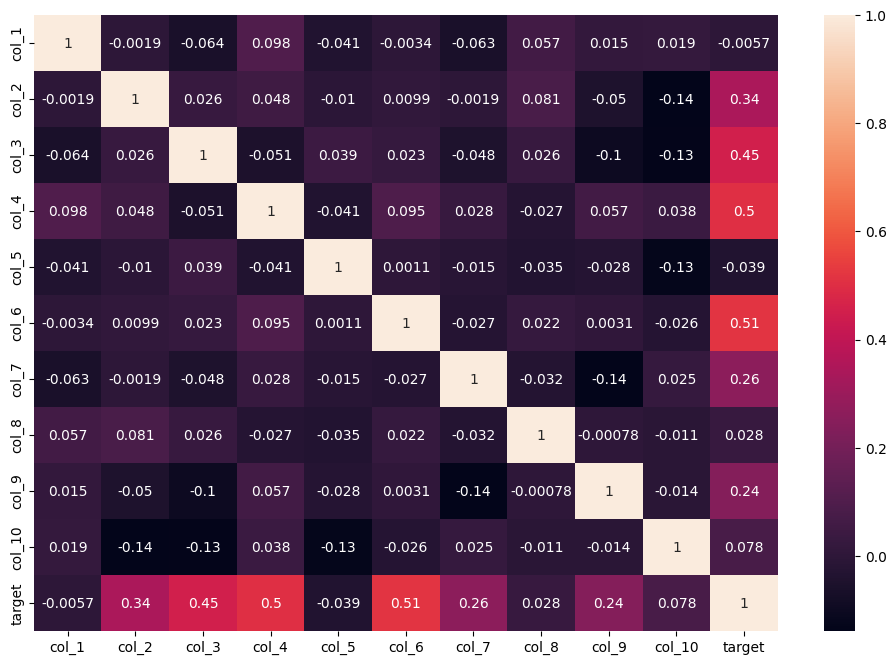

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=43, test_size=0.25)

In [24]:
model = DecisionTreeRegressor()

In [25]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [27]:
model.score(x_train,y_train)

1.0

In [28]:
y_pr = model.predict(x_test)

In [29]:
r2 = r2_score(y_test,y_pr)

In [30]:
r2

0.25823526368609273

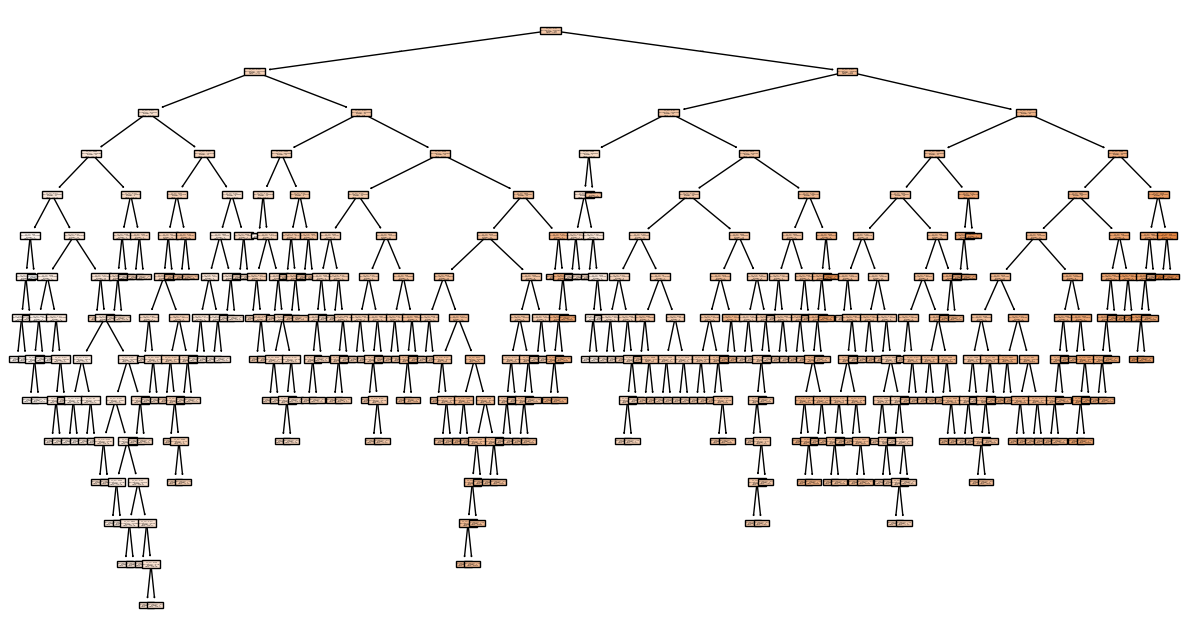

In [37]:
plt.figure(figsize=(15,8))
plot_tree(model,filled=True, feature_names=df.columns[:-1])
plt.show()

In [49]:
parameters = {"criterion" : ["squared_error", "friedman_mse", "absolute_error", "possion"],
             "max_depth" : [3,4,5,6,7],
             "max_features" : [5,6,7,8,9,10]}

In [50]:
gscv = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=parameters,
                   verbose=True, n_jobs=-1, cv=10, scoring="r2")

In [51]:
gscv.fit(x_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'possion'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [5, 6, 7, 8, 9, 10]},
             scoring='r2', verbose=True)

In [52]:
gscv.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 6}

In [53]:
gscv.best_score_

np.float64(0.4867891097785245)

In [54]:
tunned_model = DecisionTreeRegressor(criterion="friedman_mse",max_depth=5,max_features=7)

In [59]:
tunned_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features=7)

In [60]:
tunned_model.score(x_train,y_train)

0.8685133901227061

In [63]:
y_pr_tunned = tunned_model.predict(x_test)

In [64]:
r2_score(y_test,y_pr_tunned)

0.2000993979885326

In [66]:
root_mean_squared_error(y_test,y_pr)

np.float64(118.80970524341612)